<a href="https://colab.research.google.com/github/TheodorosChristou/COM616_AE2_TheodorosChristou/blob/main/ResNet_Architecture_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_41 (Conv2D)          (None, 32, 32, 128)          3584      ['input_1[0][0]']             
                                                                                                  
 conv2d_42 (Conv2D)          (None, 32, 32, 128)          147584    ['conv2d_41[0][0]']           
                                                                                                  
 max_pooling2d_33 (MaxPooli  (None, 16, 16, 128)          0         ['conv2d_42[0][0]']           
 ng2D)                                                                                        

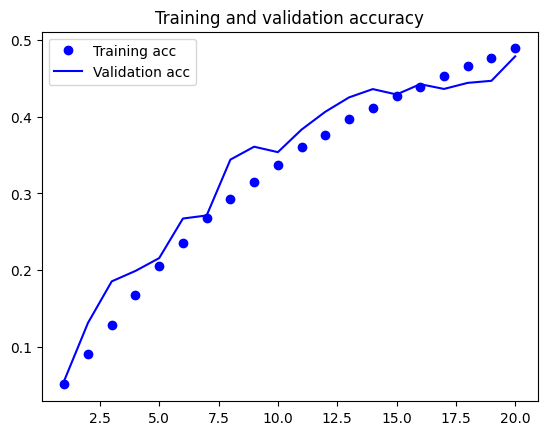

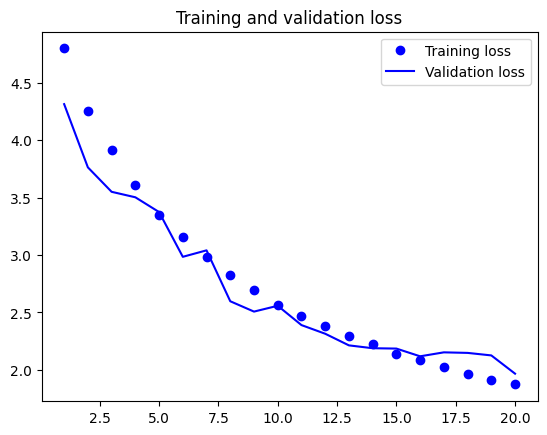

313/313 [==============================] - 1s 3ms/step
10000
                   precision    recall  f1-score   support

           beaver    0.72449   0.71000   0.71717       100
          dolphin    0.65116   0.56000   0.60215       100
            otter    0.43836   0.32000   0.36994       100
             seal    0.24242   0.16000   0.19277       100
            whale    0.22105   0.42000   0.28966       100
         aquarium    0.39103   0.61000   0.47656       100
             fish    0.41538   0.54000   0.46957       100
              ray    0.58462   0.38000   0.46061       100
            shark    0.93750   0.45000   0.60811       100
            trout    0.45455   0.70000   0.55118       100
          orchids    0.50000   0.19000   0.27536       100
          poppies    0.44118   0.15000   0.22388       100
            roses    0.44715   0.55000   0.49327       100
       sunflowers    0.36441   0.43000   0.39450       100
           tulips    0.51562   0.33000   0.40244     

In [ ]:
def ResNet():
    inputs = layers.Input(shape=(32,32,3))
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)

    for _ in range(2):
        residual = x
        x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
        x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.4)(x)
        x = layers.add([x, residual])

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(100, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

ResNet = ResNet()

optimizer = Adam(learning_rate=0.0001)
ResNet.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

ResNet.summary()

# Implement Early Stopping
import time

def gpu():
    with tf.device('/device:GPU:0'):

        training_start = time.time()
        history = ResNet.fit(X_train, y_train, epochs=20, batch_size=64,
                                  validation_data=(X_validation, y_validation))
        training_stop = time.time()
        training_time = training_stop - training_start
        print(f"Training time: {training_time}")
        training_plot(history)
        evaluation(ResNet)
        scores = ResNet.evaluate(test_images, test_labels)
        print(f'accuracy on test set: {ResNet.metrics_names[1]} of {scores[1]*100}')
        return ResNet

ResNet = gpu()

# Evaluate the model
test_loss, test_acc = ResNet.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')